In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [2]:
df = pd.read_csv('Chicago_crime_data.csv', dtype={'ID': object, 'beat_num': object})
pd.options.display.max_rows = 200

In [5]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'beat_num',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
cross=pd.crosstab(df['Domestic'], df['Arrest'])
cross

Arrest     False  True 
Domestic               
False     179478  45016
True       35276   7408

In [7]:
chi2_contingency(cross)

(165.20895928326414,
 8.234997211784021e-38,
 1,
 array([[180445.18813675,  44048.81186325],
        [ 34308.81186325,   8375.18813675]]))

In [8]:
type_loc_cross = pd.crosstab(df["Primary Type"], df["Location Description"])
type_loc_cross

Location Description               ABANDONED BUILDING  AIRCRAFT  \
Primary Type                                                      
ARSON                                              10         0   
ASSAULT                                             5         0   
BATTERY                                            12        19   
BURGLARY                                           54         0   
CONCEALED CARRY LICENSE VIOLATION                   0         0   
CRIM SEXUAL ASSAULT                                19         0   
CRIMINAL DAMAGE                                    30         0   
CRIMINAL TRESPASS                                  29         0   
DECEPTIVE PRACTICE                                  2         2   
GAMBLING                                            1         0   
HOMICIDE                                            0         0   
HUMAN TRAFFICKING                                   0         0   
INTERFERENCE WITH PUBLIC OFFICER                    6         0   
INTIMIDATION                                        0         0   
KIDNAPPING                                          0         0   
LIQUOR LAW VIOLATION                                0         0   
MOTOR VEHICLE THEFT                                 0         0   
NARCOTICS                                          88         1   
NON-CRIMINAL                                        0         0   
NON-CRIMINAL (SUBJECT SPECIFIED)                    0         0   
OBSCENITY                                           0         0   
OFFENSE INVOLVING CHILDREN                          0         0   
OTHER NARCOTIC VIOLATION                            0         0   
OTHER OFFENSE                                      18         1   
PROSTITUTION                                        0         0   
PUBLIC INDECENCY                                    0         0   
PUBLIC PEACE VIOLATION                              5        15   
ROBBERY                                             9         0   
SEX OFFENSE                                         1         2   
STALKING                                            0         0   
THEFT                                              29        34   
WEAPONS VIOLATION                                  12         0   

Location Description               AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA  \
Primary Type                                                                         
ARSON                                                                            0   
ASSAULT                                                                          6   
BATTERY                                                                          5   
BURGLARY                                                                         0   
CONCEALED CARRY LICENSE VIOLATION                                                1   
CRIM SEXUAL ASSAULT                                                              0   
CRIMINAL DAMAGE                                                                  5   
CRIMINAL TRESPASS                                                                5   
DECEPTIVE PRACTICE                                                              19   
GAMBLING                                                                         0   
HOMICIDE                                                                         0   
HUMAN TRAFFICKING                                                                0   
INTERFERENCE WITH PUBLIC OFFICER                                                 0   
INTIMIDATION                                                                     0   
KIDNAPPING                                                                       0   
LIQUOR LAW VIOLATION                                                             0   
MOTOR VEHICLE THEFT                                                              5   
NARCOTICS                                                                        0   
N

In [9]:
Locations_dict                     ={
    'Airport & Related' :{
        'AIRCRAFT', 
        'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA',
        'AIRPORT BUILDING NON-TERMINAL - SECURE AREA',
        'AIRPORT EXTERIOR - NON-SECURE AREA',
        'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT PARKING LOT',
        'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA',
        'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
        'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA',
        'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA',
        'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA',
        'AIRPORT TRANSPORTATION SYSTEM (ATS)',
        'AIRPORT VENDING ESTABLISHMENT', 'AIRPORT/AIRCRAFT'
    } ,
    
    'Hospitals & Related':{
        'ANIMAL HOSPITAL', 
        'HOSPITAL BUILDING/GROUNDS', 
        'MEDICAL/DENTAL OFFICE', 
        'NURSING HOME',
        'NURSING HOME/RETIREMENT HOME',
    },
    
    'Residential & Related':{
        'APARTMENT',
        'BASEMENT', 
        'STAIRWELL', 
        'CHA APARTMENT', #Chicago Housing Autority
        'CHA HALLWAY',
        'CHA HALLWAY/STAIRWELL/ELEVATOR',
        'CHA PARKING LOT',
        'CHA PARKING LOT/GROUNDS', 
        'DRIVEWAY - RESIDENTIAL', 
        'PORCH',
        'RESIDENCE',
        'RESIDENCE PORCH/HALLWAY',
        'RESIDENCE-GARAGE',
        'RESIDENTIAL YARD (FRONT/BACK)',  
        'ROOMING HOUSE',
        'GARAGE', 
        'HOTEL/MOTEL',
        'HOUSE',
    },
    
    'Colleges & Related': {
        'SCHOOL, PRIVATE, BUILDING',
        'SCHOOL, PRIVATE, GROUNDS',
        'SCHOOL, PUBLIC, BUILDING',
        'SCHOOL, PUBLIC, GROUNDS', 
        'COLLEGE/UNIVERSITY GROUNDS',
        'COLLEGE/UNIVERSITY RESIDENCE HALL', 
        'DAY CARE CENTER', 
        'SCHOOL YARD',
                         },
    
    'Goverment Buildings & Related':{ 
        'FEDERAL BUILDING',
        'FIRE STATION', 
        'FOREST PRESERVE', 
        'POLICE FACILITY/VEH PARKING LOT',
        'GOVERNMENT BUILDING/PROPERTY', 
        'JAIL / LOCK-UP FACILITY', 
        'LIBRARY',
        'PARK PROPERTY',},
    
    'Liquor Stores & Related':{
        'TAVERN',
        'TAVERN/LIQUOR STORE', 
        'BAR OR TAVERN', 
        'CLUB',  
        'POOL ROOM',
         },
    
    'Stores & Related':{
        'SMALL RETAIL STORE',
        'APPLIANCE STORE',
        'BARBERSHOP', 
        'ATHLETIC CLUB', 
        'BOWLING ALLEY', 
        'CAR WASH', 
        'CLEANING STORE', 
        'COIN OPERATED MACHINE', 
        'COMMERCIAL / BUSINESS OFFICE',
        'CONVENIENCE STORE', 
        'DEPARTMENT STORE', 
        'DRUG STORE', 
        'VESTIBULE',  
        'GAS STATION',
        'GAS STATION DRIVE/PROP.', 
        'RESTAURANT', 
        'GROCERY FOOD STORE', 
        'RETAIL STORE', 
        'MOVIE HOUSE/THEATER', 
        'FACTORY/MANUFACTURING BUILDING',
        'NEWSSTAND',
        'PARKING LOT',},
    
    'Vehicles & Related':{
        'VEHICLE - DELIVERY TRUCK',
        'VEHICLE - OTHER RIDE SERVICE',
        'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)',
        'VEHICLE NON-COMMERCIAL',
        'VEHICLE-COMMERCIAL','TAXICAB', 'AUTO',
        'AUTO / BOAT / RV DEALERSHIP','BOAT/WATERCRAFT', 'GANGWAY', 'OTHER COMMERCIAL TRANSPORTATION',
        
        
    }, 
    
    'Public Transport & Related':{
        'CTA "L" PLATFORM',
        'CTA BUS',
        'CTA BUS STOP',
        'CTA GARAGE / OTHER PROPERTY',
        'CTA PLATFORM',
        'CTA PROPERTY',
        'CTA STATION',
        'CTA TRACKS - RIGHT OF WAY',
        'CTA TRAIN', 'OTHER RAILROAD PROP / TRAIN DEPOT',

                    },
    
    'Street & Related': {
        'ALLEY', 
        'BRIDGE', 
        'CEMETARY',
        'CHURCH',
        'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 
        'CONSTRUCTION SITE', 
        'DRIVEWAY', 
        'YARD', 
        'VACANT LOT',
        'VACANT LOT/LAND', 
        'SIDEWALK', 
        'PARKING LOT/GARAGE(NON.RESID.)', 
        'ABANDONED BUILDING', 
        'STREET', 
        'HIGHWAY/EXPRESSWAY',  
        'HALLWAY',
        'LAKEFRONT/WATERFRONT/RIVERBANK', 
        'SPORTS ARENA/STADIUM'    
        
    },
    
    'Bank & Related':{
        'BANK',
        'ATM (AUTOMATIC TELLER MACHINE)', 
        'CREDIT UNION', 
        'CURRENCY EXCHANGE', 
        'RIVER BANK',
        'SAVINGS AND LOAN', 
        'PAWN SHOP', 
        'WAREHOUSE'},
    
    'Other Locations':{'OTHER', }
    
}


Offenses_dict={
    'Theft Related': {
        'BURGLARY', 
        'THEFT',
        'CRIMINAL TRESPASS', 
        'MOTOR VEHICLE THEFT', 
        'ROBBERY',
        },
    
    'Property Damage': {
        'CRIMINAL DAMAGE', 
        'ARSON', 
        },

    'Violence & Related' :{
        'BATTERY',
        'ASSAULT',
        'KIDNAPPING',   
        'HOMICIDE', 
        },
    
    'Sexual Offenses & Related':{
        'CRIM SEXUAL ASSAULT',
        'SEX OFFENSE',
        'OBSCENITY',
        'HUMAN TRAFFICKING', 
        'PROSTITUTION',
        'PUBLIC INDECENCY',
        'STALKING',
        'OFFENSE INVOLVING CHILDREN'},
    
    'Dangerous practices':{ 
        'DECEPTIVE PRACTICE', 
        'WEAPONS VIOLATION',
        'INTIMIDATION',
        'CONCEALED CARRY LICENSE VIOLATION',
        'INTERFERENCE WITH PUBLIC OFFICER'},
    
    'Substances & Related':{
        'NARCOTICS',
        'OTHER NARCOTIC VIOLATION',
        'GAMBLING', 
        'LIQUOR LAW VIOLATION'},
    
    'Other Offenses':{
        'PUBLIC PEACE VIOLATION'
        'NON-CRIMINAL',
        'OTHER OFFENSE',
        'NON-CRIMINAL (SUBJECT SPECIFIED)' }}

In [18]:
Locations_dict['Airport & Related']

{'AIRCRAFT',
 'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA',
 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA',
 'AIRPORT EXTERIOR - NON-SECURE AREA',
 'AIRPORT EXTERIOR - SECURE AREA',
 'AIRPORT PARKING LOT',
 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA',
 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
 'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA',
 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA',
 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA',
 'AIRPORT TRANSPORTATION SYSTEM (ATS)',
 'AIRPORT VENDING ESTABLISHMENT',
 'AIRPORT/AIRCRAFT'}

In [20]:
dict_Locations=dict()
for key in Locations_dict.keys():
    for value in Locations_dict[key]:
        dict_Locations[value]=key
        
dict_Locations

{'AIRPORT VENDING ESTABLISHMENT': 'Airport & Related',
 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA': 'Airport & Related',
 'AIRPORT EXTERIOR - NON-SECURE AREA': 'Airport & Related',
 'AIRPORT TRANSPORTATION SYSTEM (ATS)': 'Airport & Related',
 'AIRPORT EXTERIOR - SECURE AREA': 'Airport & Related',
 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA': 'Airport & Related',
 'AIRPORT/AIRCRAFT': 'Airport & Related',
 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA': 'Airport & Related',
 'AIRPORT PARKING LOT': 'Airport & Related',
 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA': 'Airport & Related',
 'AIRCRAFT': 'Airport & Related',
 'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA': 'Airport & Related',
 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA': 'Airport & Related',
 'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA': 'Airport & Related',
 'HOSPITAL BUILDING/GROUNDS': 'Hospitals & Related',
 'NURSING HOME/RETIREMENT HOME': 'Hospitals & Related',
 'NURSING HOME': 'Hospitals & Related',
 'ANIM

In [21]:
#Here is one possible answer.

#Let us reverse the keys/values of our dictionary.
dict_Locations=dict()
for key in Locations_dict.keys():
    for value in Locations_dict[key]:
        dict_Locations[value]=key

dict_Offenses=dict()
for key in Offenses_dict.keys():
    for value in Offenses_dict[key]:
        dict_Offenses[value]=key

#Then, we use the new dicts to create new columns the in the data frame.
df["Offenses_cat"]=df["Primary Type"].map(dict_Offenses)
df["Location_cat"]=df["Location Description"].map(dict_Locations)

#Finally, we create the contingency table.
Offense_Location_cross = pd.crosstab(df["Offenses_cat"], df["Location_cat"])
Offense_Location_cross

Location_cat               Airport & Related  Bank & Related  \
Offenses_cat                                                   
Dangerous practices                      252            1536   
Other Offenses                            60              25   
Property Damage                           34             117   
Sexual Offenses & Related                  9               6   
Substances & Related                      60               7   
Theft Related                            620             521   
Violence & Related                       180             122   

Location_cat               Colleges & Related  Goverment Buildings & Related  \
Offenses_cat                                                                   
Dangerous practices                       179                            206   
Other Offenses                            252                            230   
Property Damage                           334                            274   
Sexual Offenses & Related                 280                            131   
Substances & Related                      190                            692   
Theft Related                            1221                           1377   
Violence & Related                       2984                           1022   

Location_cat               Hospitals & Related  Liquor Stores & Related  \
Offenses_cat                                                              
Dangerous practices                        142                      226   
Other Offenses                             150                       48   
Property Damage                            111                       99   
Sexual Offenses & Related                  149                       33   
Substances & Related                        97                      107   
Theft Related                              731                     1272   
Violence & Related                         917                      766   

Location_cat               Other Locations  Public Transport & Related  \
Offenses_cat                                                             
Dangerous practices                   2331                         439   
Other Offenses                        1355                          36   
Property Damage                        816                         543   
Sexual Offenses & Related              241                         101   
Substances & Related                   149                         163   
Theft Related                         4605                        2714   
Violence & Related                    1780                        1297   

Location_cat               Residential & Related  Stores & Related  \
Offenses_cat                                                         
Dangerous practices                         9460              3312   
Other Offenses                              9555               831   
Property Damage                            12147              1665   
Sexual Offenses & Related                   3429               112   
Substances & Related                        1889               360   
Theft Related                              28834             21194   
Violence & Related                         32103              4246   

Location_cat               Street & Related  Vehicles & Related  
Offenses_cat                                                     
Dangerous practices                    5409                 582  
Other Offenses                         4431                 264  
Property Damage                       12644                 703  
Sexual Offenses & Related              1363                 119  
Substances & Related                   7707                 631  
Theft Related                         41780                2564  
Violence & Related                    22964                1006

In [35]:
Offense_Location_prop= round(Offense_Location_cross.div(Offense_Location_cross.sum(axis=1), axis=0)*100,2)
Offense_Location_prop

Location_cat               Airport & Related  Bank & Related  \
Offenses_cat                                                   
Dangerous practices                     1.05            6.38   
Other Offenses                          0.35            0.15   
Property Damage                         0.12            0.40   
Sexual Offenses & Related               0.15            0.10   
Substances & Related                    0.50            0.06   
Theft Related                           0.58            0.48   
Violence & Related                      0.26            0.18   

Location_cat               Colleges & Related  Goverment Buildings & Related  \
Offenses_cat                                                                   
Dangerous practices                      0.74                           0.86   
Other Offenses                           1.46                           1.33   
Property Damage                          1.13                           0.93   
Sexual Offenses & Related                4.69                           2.19   
Substances & Related                     1.58                           5.74   
Theft Related                            1.14                           1.28   
Violence & Related                       4.30                           1.47   

Location_cat               Hospitals & Related  Liquor Stores & Related  \
Offenses_cat                                                              
Dangerous practices                       0.59                     0.94   
Other Offenses                            0.87                     0.28   
Property Damage                           0.38                     0.34   
Sexual Offenses & Related                 2.49                     0.55   
Substances & Related                      0.80                     0.89   
Theft Related                             0.68                     1.18   
Violence & Related                        1.32                     1.10   

Location_cat               Other Locations  Public Transport & Related  \
Offenses_cat                                                             
Dangerous practices                   9.68                        1.82   
Other Offenses                        7.86                        0.21   
Property Damage                       2.77                        1.84   
Sexual Offenses & Related             4.03                        1.69   
Substances & Related                  1.24                        1.35   
Theft Related                         4.29                        2.53   
Violence & Related                    2.57                        1.87   

Location_cat               Residential & Related  Stores & Related  \
Offenses_cat                                                         
Dangerous practices                        39.30             13.76   
Other Offenses                             55.43              4.82   
Property Damage                            41.19              5.65   
Sexual Offenses & Related                  57.41              1.88   
Substances & Related                       15.67              2.99   
Theft Related                              26.84             19.73   
Violence & Related                         46.27              6.12   

Location_cat               Street & Related  Vehicles & Related  
Offenses_cat                                                     
Dangerous practices                   22.47                2.42  
Other Offenses                        25.71                1.53  
Property Damage                       42.88                2.38  
Sexual Offenses & Related             22.82                1.99  
Substances & Related                  63.95                5.24  
Theft Related                         38.89                2.39  
Violence & Related                    33.10                1.45

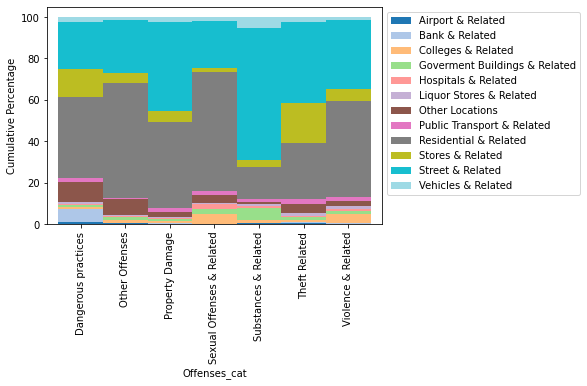

In [38]:
plt_prop = Offense_Location_prop.plot(kind='bar', stacked = True, width = 1, colormap='tab20')
plt_prop.legend(bbox_to_anchor=(1,1), loc='upper left', ncol = 1)
_ = plt.ylabel("Cumulative Percentage")

In [39]:
Location_Offense_prop= round(Offense_Location_cross.div(Offense_Location_cross.sum(axis=0), axis=1)*100,2)
Location_Offense_prop

Location_cat               Airport & Related  Bank & Related  \
Offenses_cat                                                   
Dangerous practices                    20.74           65.81   
Other Offenses                          4.94            1.07   
Property Damage                         2.80            5.01   
Sexual Offenses & Related               0.74            0.26   
Substances & Related                    4.94            0.30   
Theft Related                          51.03           22.32   
Violence & Related                     14.81            5.23   

Location_cat               Colleges & Related  Goverment Buildings & Related  \
Offenses_cat                                                                   
Dangerous practices                      3.29                           5.24   
Other Offenses                           4.63                           5.85   
Property Damage                          6.14                           6.97   
Sexual Offenses & Related                5.15                           3.33   
Substances & Related                     3.49                          17.60   
Theft Related                           22.44                          35.02   
Violence & Related                      54.85                          25.99   

Location_cat               Hospitals & Related  Liquor Stores & Related  \
Offenses_cat                                                              
Dangerous practices                       6.18                     8.86   
Other Offenses                            6.53                     1.88   
Property Damage                           4.83                     3.88   
Sexual Offenses & Related                 6.49                     1.29   
Substances & Related                      4.22                     4.19   
Theft Related                            31.82                    49.86   
Violence & Related                       39.92                    30.03   

Location_cat               Other Locations  Public Transport & Related  \
Offenses_cat                                                             
Dangerous practices                  20.67                        8.29   
Other Offenses                       12.02                        0.68   
Property Damage                       7.24                       10.26   
Sexual Offenses & Related             2.14                        1.91   
Substances & Related                  1.32                        3.08   
Theft Related                        40.84                       51.28   
Violence & Related                   15.78                       24.50   

Location_cat               Residential & Related  Stores & Related  \
Offenses_cat                                                         
Dangerous practices                         9.71             10.44   
Other Offenses                              9.81              2.62   
Property Damage                            12.47              5.25   
Sexual Offenses & Related                   3.52              0.35   
Substances & Related                        1.94              1.13   
Theft Related                              29.60             66.82   
Violence & Related                         32.95             13.39   

Location_cat               Street & Related  Vehicles & Related  
Offenses_cat                                                     
Dangerous practices                    5.62                9.92  
Other Offenses                         4.60                4.50  
Property Damage                       13.13               11.98  
Sexual Offenses & Related              1.42                2.03  
Substances & Related                   8.00               10.75  
Theft Related                         43.39               43.69  
Violence & Related                    23.85               17.14

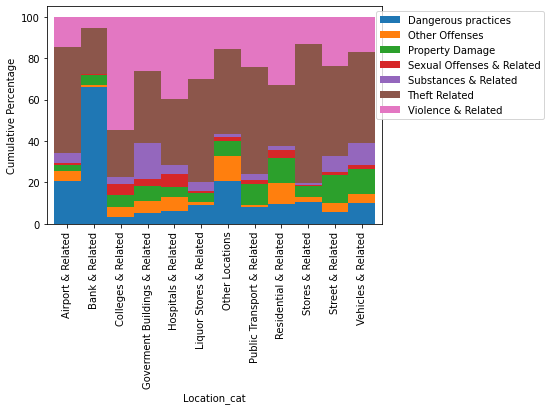

In [40]:
plt_prop_new = Location_Offense_prop.transpose().plot(kind='bar', stacked = True, width = 1)
plt_prop_new.legend(bbox_to_anchor=(1.5,1), loc='upper right', ncol = 1)
_ = plt.ylabel("Cumulative Percentage")

In [41]:
type_prop = (df["Primary Type"].value_counts()/df["Primary Type"].count()).sort_index()
type_prop

ARSON                                0.001662
ASSAULT                              0.072251
BATTERY                              0.184214
BURGLARY                             0.048657
CONCEALED CARRY LICENSE VIOLATION    0.000258
CRIM SEXUAL ASSAULT                  0.006105
CRIMINAL DAMAGE                      0.108703
CRIMINAL TRESPASS                    0.025507
DECEPTIVE PRACTICE                   0.067674
GAMBLING                             0.000715
HOMICIDE                             0.002526
HUMAN TRAFFICKING                    0.000030
INTERFERENCE WITH PUBLIC OFFICER     0.004068
INTIMIDATION                         0.000565
KIDNAPPING                           0.000711
LIQUOR LAW VIOLATION                 0.000715
MOTOR VEHICLE THEFT                  0.042612
NARCOTICS                            0.043638
NON-CRIMINAL                         0.000138
NON-CRIMINAL (SUBJECT SPECIFIED)     0.000007
OBSCENITY                            0.000322
OFFENSE INVOLVING CHILDREN        

In [45]:
location_prop = (df["Location Description"].value_counts()/df["Location Description"].count()).sort_index()
location_prop

ABANDONED BUILDING                                       0.001235
AIRCRAFT                                                 0.000277
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA          0.000371
AIRPORT BUILDING NON-TERMINAL - SECURE AREA              0.000299
AIRPORT EXTERIOR - NON-SECURE AREA                       0.000341
AIRPORT EXTERIOR - SECURE AREA                           0.000094
AIRPORT PARKING LOT                                      0.000322
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA           0.000793
AIRPORT TERMINAL LOWER LEVEL - SECURE AREA               0.000213
AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA             0.000041
AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA           0.000296
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA               0.000861
AIRPORT TRANSPORTATION SYSTEM (ATS)                      0.000034
AIRPORT VENDING ESTABLISHMENT                            0.000442
AIRPORT/AIRCRAFT                                         0.000277
ALLEY     

In [47]:
primary_location_cross = pd.crosstab(df['Primary Type'], df['Location Description'])
primary_location_cross

Location Description               ABANDONED BUILDING  AIRCRAFT  \
Primary Type                                                      
ARSON                                              10         0   
ASSAULT                                             5         0   
BATTERY                                            12        19   
BURGLARY                                           54         0   
CONCEALED CARRY LICENSE VIOLATION                   0         0   
CRIM SEXUAL ASSAULT                                19         0   
CRIMINAL DAMAGE                                    30         0   
CRIMINAL TRESPASS                                  29         0   
DECEPTIVE PRACTICE                                  2         2   
GAMBLING                                            1         0   
HOMICIDE                                            0         0   
HUMAN TRAFFICKING                                   0         0   
INTERFERENCE WITH PUBLIC OFFICER                    6         0   
INTIMIDATION                                        0         0   
KIDNAPPING                                          0         0   
LIQUOR LAW VIOLATION                                0         0   
MOTOR VEHICLE THEFT                                 0         0   
NARCOTICS                                          88         1   
NON-CRIMINAL                                        0         0   
NON-CRIMINAL (SUBJECT SPECIFIED)                    0         0   
OBSCENITY                                           0         0   
OFFENSE INVOLVING CHILDREN                          0         0   
OTHER NARCOTIC VIOLATION                            0         0   
OTHER OFFENSE                                      18         1   
PROSTITUTION                                        0         0   
PUBLIC INDECENCY                                    0         0   
PUBLIC PEACE VIOLATION                              5        15   
ROBBERY                                             9         0   
SEX OFFENSE                                         1         2   
STALKING                                            0         0   
THEFT                                              29        34   
WEAPONS VIOLATION                                  12         0   

Location Description               AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA  \
Primary Type                                                                         
ARSON                                                                            0   
ASSAULT                                                                          6   
BATTERY                                                                          5   
BURGLARY                                                                         0   
CONCEALED CARRY LICENSE VIOLATION                                                1   
CRIM SEXUAL ASSAULT                                                              0   
CRIMINAL DAMAGE                                                                  5   
CRIMINAL TRESPASS                                                                5   
DECEPTIVE PRACTICE                                                              19   
GAMBLING                                                                         0   
HOMICIDE                                                                         0   
HUMAN TRAFFICKING                                                                0   
INTERFERENCE WITH PUBLIC OFFICER                                                 0   
INTIMIDATION                                                                     0   
KIDNAPPING                                                                       0   
LIQUOR LAW VIOLATION                                                             0   
MOTOR VEHICLE THEFT                                                              5   
NARCOTICS                                                                        0   
N

In [55]:
g, p, dof, expctd = chi2_contingency(primary_location_cross)
#print("p-value of Chi-square test for Primary Type vs. Location =", p, g, dof)
round(p,10)

0.0

In [56]:
df4=df[df['Location_cat'].isin({'Residential & Related'})]
df4

ID Case Number            Date                   Block  IUCR  \
0       11192233    JB100016  12/31/17 23:58    046XX N ST LOUIS AVE   630   
2       11192540    JB100551  12/31/17 23:48     001XX E SUPERIOR ST   890   
4       11192254    JB100003  12/31/17 23:45        115XX S STATE ST  041A   
6       11192238    JA569474  12/31/17 23:40       048XX N AVERS AVE  1310   
10      11192349    JB100035  12/31/17 23:30         012XX W 97TH ST   497   
...          ...         ...             ...                     ...   ...   
267170  11488630    JB491364     1/1/17 0:00  081XX S SOUTH SHORE DR  1153   
267171  11587511    JC142200     1/1/17 0:00    022XX N PARKSIDE AVE  1752   
267172  10967496    JA289346     1/1/17 0:00      084XX S PAULINA ST   486   
267173  11035993    JA367627     1/1/17 0:00       026XX W COYLE AVE  1752   
267176  10801141    JA100083     1/1/17 0:00     011XX W DICKENS AVE   486   

                      Primary Type  \
0                         BURGLARY   
2                            THEFT   
4                          BATTERY   
6                  CRIMINAL DAMAGE   
10                         BATTERY   
...                            ...   
267170          DECEPTIVE PRACTICE   
267171  OFFENSE INVOLVING CHILDREN   
267172                     BATTERY   
267173  OFFENSE INVOLVING CHILDREN   
267176                     BATTERY   

                                           Description Location Description  \
0                               ATTEMPT FORCIBLE ENTRY            APARTMENT   
2                                        FROM BUILDING          HOTEL/MOTEL   
4                                  AGGRAVATED: HANDGUN            RESIDENCE   
6                                          TO PROPERTY            APARTMENT   
10      AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON            RESIDENCE   
...                                                ...                  ...   
267170             FINANCIAL IDENTITY THEFT OVER $ 300            RESIDENCE   
267171                   AGG CRIM SEX ABUSE FAM MEMBER            RESIDENCE   
267172                         DOMESTIC BATTERY SIMPLE            RESIDENCE   
267173                   AGG CRIM SEX ABUSE FAM MEMBER            RESIDENCE   
267176                         DOMESTIC BATTERY SIMPLE            APARTMENT   

        Arrest  Domestic  ... FBI Code  X Coordinate  Y Coordinate  Year  \
0        False     False  ...        5     1152214.0     1930694.0  2017   
2        False     False  ...        6     1177508.0     1905401.0  2017   
4        False      True  ...      04B     1178329.0     1828012.0  2017   
6        False     False  ...       14     1149845.0     1931713.0  2017   
10       False     False  ...      04B     1169792.0     1840606.0  2017   
...        ...       ...  ...      ...           ...           ...   ...   
267170   False     False  ...       11           NaN           NaN  2017   
267171   False     False  ...       17           NaN           NaN  2017   
267172   False      True  ...      08B     1166482.0     1848636.0  2017   
267173   False     False  ...       20     1157570.0     1946019.0  2017   
267176   False      True  ...      08B     1168452.0     1914119.0  2017   

            Updated On   Latitude  Longitude                       Location  \
0         5/4/18 15:51  41.965694 -87.715726  (41.965693651, -87.715726125)   
2         5/4/18 15:51  41.895751 -87.623496  (41.895750913, -87.623495923)   
4         5/4/18 15:51  41.683369 -87.622830  (41.683369303, -87.622829524)   
6         5/4/18 15:51  41.968536 -87.724410  (41.968536385, -87.724409882)   
10        5/4/18 15:51  41.718118 -87.653717  (41.718118187, -87.653716662)   
...                ...        ...        ...                            ...   
267170  10/27/18 16:07        NaN        NaN                            NaN   
267171   2/16/19 15:59        NaN        NaN                            NaN   
267172   2/10/18 15:50  41.740225 -87.665612  (

In [58]:
df4=df4[df4['Offenses_cat']=='Violence & Related']
df4

ID Case Number            Date                Block  IUCR  \
4       11192254    JB100003  12/31/17 23:45     115XX S STATE ST  041A   
10      11192349    JB100035  12/31/17 23:30      012XX W 97TH ST   497   
13      11192385    JB100030  12/31/17 23:26  031XX W FULTON BLVD   497   
14      11192266    JA569467  12/31/17 23:25   023XX S ALBANY AVE   486   
16      11192302    JA569461  12/31/17 23:20    077XX S LAFLIN ST  051A   
...          ...         ...             ...                  ...   ...   
267039  11783288    JC365494     1/1/17 0:01   089XX S JUSTINE ST   485   
267150  10979113    JA304447     1/1/17 0:00    024XX N TRIPP AVE   560   
267169  10801104    JA100015     1/1/17 0:00      004XX W 66TH ST   486   
267172  10967496    JA289346     1/1/17 0:00   084XX S PAULINA ST   486   
267176  10801141    JA100083     1/1/17 0:00  011XX W DICKENS AVE   486   

       Primary Type                                     Description  \
4           BATTERY                             AGGRAVATED: HANDGUN   
10          BATTERY  AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON   
13          BATTERY  AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON   
14          BATTERY                         DOMESTIC BATTERY SIMPLE   
16          ASSAULT                             AGGRAVATED: HANDGUN   
...             ...                                             ...   
267039      BATTERY                           AGGRAVATED OF A CHILD   
267150      ASSAULT                                          SIMPLE   
267169      BATTERY                         DOMESTIC BATTERY SIMPLE   
267172      BATTERY                         DOMESTIC BATTERY SIMPLE   
267176      BATTERY                         DOMESTIC BATTERY SIMPLE   

       Location Description  Arrest  Domestic  ... FBI Code  X Coordinate  \
4                 RESIDENCE   False      True  ...      04B     1178329.0   
10                RESIDENCE   False     False  ...      04B     1169792.0   
13                APARTMENT    True      True  ...      04B     1155463.0   
14                APARTMENT   False      True  ...      08B     1156063.0   
16                APARTMENT   False     False  ...      04A     1167458.0   
...                     ...     ...       ...  ...      ...           ...   
267039            RESIDENCE   False     False  ...      04B           NaN   
267150            RESIDENCE   False      True  ...      08A     1147641.0   
267169            APARTMENT    True      True  ...      08B     1174537.0   
267172            RESIDENCE   False      True  ...      08B     1166482.0   
267176            APARTMENT   False      True  ...      08B     1168452.0   

        Y Coordinate  Year     Updated On   Latitude  Longitude  \
4          1828012.0  2017   5/4/18 15:51  41.683369 -87.622830   
10         1840606.0  2017   5/4/18 15:51  41.718118 -87.653717   
13         1901838.0  2017  8/17/18 15:59  41.886446 -87.704558   
14         1888248.0  2017   5/4/18 15:51  41.849141 -87.702721   
16         1853409.0  2017   5/4/18 15:51  41.753302 -87.661899   
...              ...   ...            ...        ...        ...   
267039           NaN  2017   8/6/19 16:17        NaN        NaN   
267150     1915933.0  2017  2/10/18 15:50  41.925277 -87.732920   
267169     1861156.0  2017  2/14/17 15:49  41.774406 -87.635727   
267172     1848636.0  2017  2/10/18 15:50  41.740225 -87.665612   
267176     1914119.0  2017  2/14/17 15:49  41.919874 -87.656504   

                             Location        Offenses_cat  \
4       (41.683369303, -87.622829524)  Violence & Related   
10      (41.718118187, -87.653716662)  Violence & Related   
13      (41.886445649, -87.704558181)  Violence & Related   
14      (41.849141176, -87.702721436)  Violence & Related   
16      (41.753301733, -87.661899406)  Violence & Related   
...                               ...                 ...   
267039                            NaN  Violence & Related   
267150  (41.925277458, -87.732920414)  Vio

In [59]:
#First, we filter our data to include only violent offences that took place around residential areas.

df4=df[df['Location_cat'].isin({'Residential & Related'})]
df4=df4[df4['Offenses_cat']=='Violence & Related']
#type_loc_cross4 = pd.crosstab(df4["Location Description"],df4["Primary Type"]).apply(lambda r: r/r.sum()*100, axis=0)
type_loc_cross4 = pd.crosstab(df4["Location Description"],df4["Primary Type"])
type_loc_cross4

Primary Type                    ASSAULT  BATTERY  HOMICIDE  KIDNAPPING
Location Description                                                  
APARTMENT                          2839    11706        45          14
BASEMENT                              0        0         1           0
CHA APARTMENT                        89      283         1           0
CHA HALLWAY                           0        0         1           0
CHA HALLWAY/STAIRWELL/ELEVATOR       52       55         0           0
CHA PARKING LOT                       0        0         4           0
CHA PARKING LOT/GROUNDS              90      152         0           0
DRIVEWAY - RESIDENTIAL               30       38         0           0
GARAGE                                0        0         3           0
HOTEL/MOTEL                          70      243         0           1
HOUSE                                 0        0        22           0
PORCH                                 0        0        24           0
RESIDENCE                          3189    10136         0          45
RESIDENCE PORCH/HALLWAY             553      976         0           1
RESIDENCE-GARAGE                     41       83         0           1
RESIDENTIAL YARD (FRONT/BACK)       495      815         0           1
ROOMING HOUSE                         0        0         1           0
STAIRWELL                             0        0         3           0

In [60]:
g, p, dof, expctd = chi2_contingency(type_loc_cross4)
print("p-value of Chi-square test for Violence & Related Offenses vs. Residential & Related Locations =", p)

p-value of Chi-square test for Violence & Related Offenses vs. Residential & Related Locations = 0.0


In [61]:
# discretize time
df['date_py'] = pd.to_datetime(df['Date'])
df['day_of_week'] = df['date_py'].dt.dayofweek


In [62]:
df

ID Case Number            Date                     Block  IUCR  \
0       11192233    JB100016  12/31/17 23:58      046XX N ST LOUIS AVE   630   
1       11196379    JB105867  12/31/17 23:50  024XX N LAKE SHORE DR NB   460   
2       11192540    JB100551  12/31/17 23:48       001XX E SUPERIOR ST   890   
3       11192239    JB100032  12/31/17 23:45          019XX S CANAL ST  1320   
4       11192254    JB100003  12/31/17 23:45          115XX S STATE ST  041A   
...          ...         ...             ...                       ...   ...   
267173  11035993    JA367627     1/1/17 0:00         026XX W COYLE AVE  1752   
267174  10942975    JA261045     1/1/17 0:00         035XX S GILES AVE   281   
267175  10942796    JA260938     1/1/17 0:00       028XX N WESTERN AVE  1330   
267176  10801141    JA100083     1/1/17 0:00       011XX W DICKENS AVE   486   
267177  11255786    JB185271     1/1/17 0:00          045XX N HAZEL ST  1155   

                      Primary Type                          Description  \
0                         BURGLARY               ATTEMPT FORCIBLE ENTRY   
1                          BATTERY                               SIMPLE   
2                            THEFT                        FROM BUILDING   
3                  CRIMINAL DAMAGE                           TO VEHICLE   
4                          BATTERY                  AGGRAVATED: HANDGUN   
...                            ...                                  ...   
267173  OFFENSE INVOLVING CHILDREN        AGG CRIM SEX ABUSE FAM MEMBER   
267174         CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   
267175           CRIMINAL TRESPASS                              TO LAND   
267176                     BATTERY              DOMESTIC BATTERY SIMPLE   
267177          DECEPTIVE PRACTICE  AGGRAVATED FINANCIAL IDENTITY THEFT   

                Location Description  Arrest  Domestic  ... Y Coordinate  \
0                          APARTMENT   False     False  ...    1930694.0   
1                MOVIE HOUSE/THEATER   False     False  ...    1916610.0   
2                        HOTEL/MOTEL   False     False  ...    1905401.0   
3                             STREET   False      True  ...    1891037.0   
4                          RESIDENCE   False      True  ...    1828012.0   
...                              ...     ...       ...  ...          ...   
267173                     RESIDENCE   False     False  ...    1946019.0   
267174      SCHOOL, PUBLIC, BUILDING    True     False  ...    1881615.0   
267175                         OTHER   False     False  ...    1918955.0   
267176                     APARTMENT   False      True  ...    1914119.0   
267177  COMMERCIAL / BUSINESS OFFICE   False     False  ...          NaN   

        Year     Updated On   Latitude  Longitude  \
0       2017   5/4/18 15:51  41.965694 -87.715726   
1       2017   5/4/18 15:51  41.926559 -87.631294   
2       2017   5/4/18 15:51  41.895751 -87.623496   
3       2017   5/4/18 15:51  41.856427 -87.638893   
4       2017   5/4/18 15:51  41.683369 -87.622830   
...      ...            ...        ...        ...   
267173  2017  2/10/18 15:50  42.007638 -87.695614   
267174  2017  2/10/18 15:50  41.830450 -87.619323   
267175  2017  2/10/18 15:50  41.933326 -87.687927   
267176  2017  2/14/17 15:49  41.919874 -87.656504   
267177  2017  3/15/18 15:55        NaN        NaN   

                             Location               Offenses_cat  \
0       (41.965693651, -87.715726125)              Theft Related   
1       (41.926558908, -87.631294073)         Violence & Related   
2       (41.895750913, -87.623495923)              Theft Related   
3       (41.856426716, -87.638892854)            Property Damage   
4       (41.683369303, -87.622829524)         Violence & Related   
...                               ...                        ...   
267173  (42.007638503, -87.695613598)  Sexual Offenses & Related   
267174   (41.830450306, -87.61932306)  Sexual Offenses & R

In [63]:
type_dow_cross = pd.crosstab(df['Primary Type'], df['day_of_week'])
type_dow_cross

day_of_week                           0     1     2     3     4     5     6
Primary Type                                                               
ARSON                                70    61    73    64    58    54    64
ASSAULT                            2820  2805  2868  2794  2777  2552  2688
BATTERY                            6754  6540  6427  6423  6757  7702  8615
BURGLARY                           1928  1895  2017  1873  2179  1610  1498
CONCEALED CARRY LICENSE VIOLATION    10     8     6    12    10    13    10
CRIM SEXUAL ASSAULT                 211   189   211   177   204   288   351
CRIMINAL DAMAGE                    4163  3985  3818  3881  4070  4497  4629
CRIMINAL TRESPASS                  1010   963   967  1040  1002   941   892
DECEPTIVE PRACTICE                 2816  2725  2707  2759  2934  2318  1822
GAMBLING                             27    25    26    24    36    27    26
HOMICIDE                            101    79    96    85    96    84   134
HUMAN TRAFFICKING                     0     2     2     1     1     2     0
INTERFERENCE WITH PUBLIC OFFICER    172   143   154   142   157   155   164
INTIMIDATION                         22    23    30    30    13    16    17
KIDNAPPING                           21    27    23    28    32    23    36
LIQUOR LAW VIOLATION                 15    17    21    33    28    50    27
MOTOR VEHICLE THEFT                1633  1534  1560  1533  1764  1738  1623
NARCOTICS                          1612  1600  1664  1740  2016  1589  1438
NON-CRIMINAL                          5     6     4     3    11     3     5
NON-CRIMINAL (SUBJECT SPECIFIED)      1     0     0     1     0     0     0
OBSCENITY                             9    11    20    13    11     9    13
OFFENSE INVOLVING CHILDREN          289   306   295   285   360   305   442
OTHER NARCOTIC VIOLATION              2     3     0     2     0     1     3
OTHER OFFENSE                      2485  2586  2554  2458  2568  2273  2311
PROSTITUTION                         20   143   136   152   106    92    86
PUBLIC INDECENCY                      2     3     1     1     0     2     1
PUBLIC PEACE VIOLATION              199   236   208   200   242   216   197
ROBBERY                            1727  1609  1602  1624  1697  1767  1853
SEX OFFENSE                         153   139   141   135   152   144   167
STALKING                             21    37    23    29    30    24    26
THEFT                              9165  9206  9105  9341  9882  9285  8370
WEAPONS VIOLATION                   607   666   608   618   773   746   668

In [64]:
g, p, dof, expctd = chi2_contingency(type_dow_cross)
print("p-value of Chi-square test for Primary Type vs. Day of week =", p)

p-value of Chi-square test for Primary Type vs. Day of week = 1.7125583255212727e-292


In [65]:
row_idx = df['Primary Type'].value_counts().index[:10]
row_idx

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE',
       'OTHER OFFENSE', 'BURGLARY', 'ROBBERY', 'NARCOTICS',
       'MOTOR VEHICLE THEFT'],
      dtype='object')

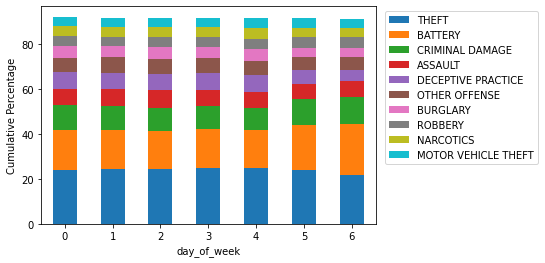

In [66]:
type_dow_plt_dat = round(type_dow_cross.div(type_dow_cross.sum(axis=0), axis=1).loc[row_idx,:]*100,2).T
plt_type_dow = type_dow_plt_dat.plot(kind='bar', stacked = True, rot = 0)
plt_type_dow.legend(bbox_to_anchor=(1.5,1), loc='upper right', ncol = 1)
_ = plt.ylabel("Cumulative Percentage")

In [67]:
df["hour_of_day"] = df.date_py.dt.hour
hod_loc_cross = pd.crosstab(df['hour_of_day'], df['Location Description'])
g, p, dof, expctd = chi2_contingency(hod_loc_cross)
print("Test for independence of crime locations and hour of the day: p-value =", p)

Test for independence of crime locations and hour of the day: p-value = 0.0


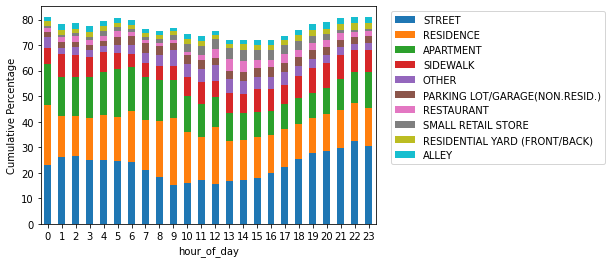

In [68]:
col_idx = df['Location Description'].value_counts().index[:10]
hod_loc_plt_dat = round(hod_loc_cross.div(hod_loc_cross.sum(axis=1), axis=0).loc[:,col_idx]*100,2)
plt_hod_loc = hod_loc_plt_dat.plot(kind='bar', stacked = True, rot = 0)
plt_hod_loc.legend(bbox_to_anchor=(1.7,1), loc='upper right', ncol = 1)
_ = plt.ylabel("Cumulative Percentage")